<a href="https://colab.research.google.com/github/naphatsiri/DADS-InClass-Master-Degree/blob/main/dads6003_svm_hw_28-11-2567.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf1.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

[1]


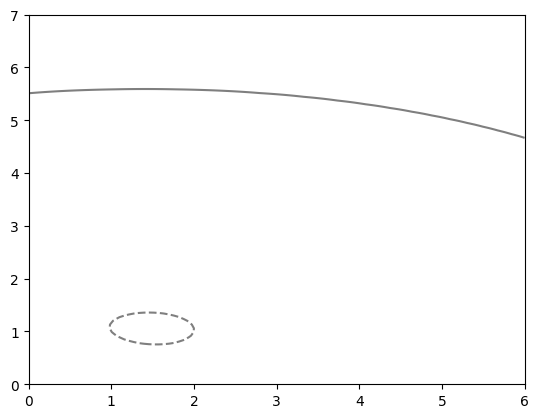

In [5]:
print(clf1.predict([[-0.8, -1]]))
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf1,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

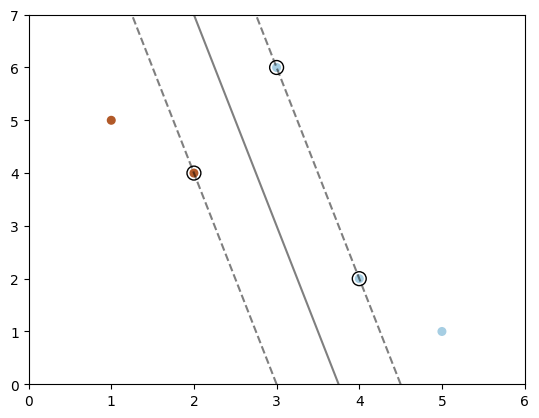

In [4]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# From dataset given that
X = np.array([
        [1, 5],
        [2, 4],
        [3, 6],
        [4, 2],
        [5, 1]
    ])
y = np.array([1, 1, -1, -1, -1])

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [6]:
#HW_SVM_usingSVC_28/11/2567

import numpy as np
from sklearn import svm

# Given data
X = np.array([
    [1, 5],
    [2, 4],
    [3, 6],
    [4, 2],
    [5, 1]
])
y = np.array([1, 1, -1, -1, -1])

# Fit the SVM model
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Calculate hinge loss for each data point
def hinge_loss_per_sample(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

y_pred = clf.decision_function(X)
losses_per_sample = hinge_loss_per_sample(y, y_pred)

print("Hinge loss for each sample:")
for i, loss in enumerate(losses_per_sample):
    print(f"Sample {i+1}: {loss:.8f}")

print(f"\nNumber of hinge losses calculated: {len(losses_per_sample)}")
print(f"Average hinge loss: {np.mean(losses_per_sample):.8f}")

Hinge loss for each sample:
Sample 1: 0.00000000
Sample 2: 0.00024368
Sample 3: 0.00000000
Sample 4: 0.00048736
Sample 5: 0.00000000

Number of hinge losses calculated: 5
Average hinge loss: 0.00014621


In [10]:
#HW_SVM_28/11/2567

import numpy as np

# Given data
X = np.array([
    [1, 5],
    [2, 4],
    [3, 6],
    [4, 2],
    [5, 1]
])
y = np.array([1, 1, -1, -1, -1])
w = np.array([1, 0])
b = -2.5

# Calculate hinge loss for each data point
def hinge_loss_per_sample(X, y, w, b):
    return np.maximum(0, 1 - y * (np.dot(X, w) + b))

losses_per_sample = hinge_loss_per_sample(X, y, w, b)

print("Hinge loss for each sample:")
for i, loss in enumerate(losses_per_sample):
    print(f"Sample {i+1}: {loss:.2f}")

print(f"\nNumber of hinge losses calculated: {len(losses_per_sample)}")
print(f"Total hinge loss: {np.sum(losses_per_sample):.2f}")

Hinge loss for each sample:
Sample 1: 2.50
Sample 2: 1.50
Sample 3: 1.50
Sample 4: 2.50
Sample 5: 3.50

Number of hinge losses calculated: 5
Total hinge loss: 11.50


Multiclass

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()